In [1]:
import random
import numpy as np
import gym
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
EPISODES = 1000

In [3]:
from collections import deque

In [4]:
class DQN:
    def __init__(self,state_size,action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = 0.99
        self.epsilon=1.0
        self.epsilon_min = 0.001
        self.epsilon_decay = 0.999
        self.memory = deque(maxlen=20000)
        self.learning_rate = 0.001
        self.model = self.build_model()
    def build_model(self):
        model = Sequential()
        model.add(Dense(32,input_dim=self.state_size,activation="relu"))
        model.add(Dense(32,activation="relu"))
        model.add(Dense(action_size,activation="linear"))
        model.compile(loss="mse",optimizer=Adam(lr=self.learning_rate))
        return model
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state,action,reward,next_state,done))
    def act(self,state):
        if np.random.rand()<self.epsilon:
            return np.random.choice(np.arange(self.action_size))
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])
    def replay(self,batch_size):
        batch_memory = random.sample(self.memory,batch_size)
        for state, action, reward, next_state, done in batch_memory:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
                #print(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            #print(target_f, target_f[0][action])
            target_f[0][action] = target
#             print(target_f[0][action])
#             print("\n")
            self.model.fit(state,target_f,epochs=1,verbose=0)
            #print(target_f)
            if self.epsilon>self.epsilon_min:
                self.epsilon = self.epsilon*self.epsilon_decay
    def load(self,name):
        self.model.load_weights(name)
    def save(self, name):
        self.model.save_weights(name)

In [5]:
if __name__ == "__main__":
    env = gym.make('CartPole-v1')
    scores = []
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQN(state_size,action_size)
    done = False
    batch_size = 128
    for idx in range(EPISODES):
        state = env.reset()
        score = 0
        render_start = False
        render_end = False
        state = np.reshape(state,[1,state_size])
        for time_p in range(511):
            action = agent.act(state)
            next_state, reward, done, info = env.step(action)
            if render_start:
                env.render()
            reward = reward if not done else -10
            score += reward
            next_state = np.reshape(next_state,[1,state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                print("episode: {}/{}, score: {}, e: {:.2}".format(idx, EPISODES, score, agent.epsilon))
                scores.append(score)
                break
        if render_end:        
            env.close()
        if len(agent.memory)>batch_size:
            agent.replay(batch_size)
        if idx % 10 == 0:
             agent.save("./cartpole-dqn.h5")

I0419 22:36:36.917045 140454300141376 registration.py:117] Making new env: CartPole-v1
/home/sourcecode369/anaconda3/envs/drlnd/lib/python3.6/site-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


episode: 0/1000, score: 2.0, e: 1.0
episode: 1/1000, score: 0.0, e: 1.0
episode: 2/1000, score: 31.0, e: 1.0
episode: 3/1000, score: 2.0, e: 1.0
episode: 4/1000, score: 13.0, e: 1.0
episode: 5/1000, score: 16.0, e: 1.0
episode: 6/1000, score: 2.0, e: 0.88
episode: 7/1000, score: 53.0, e: 0.77
episode: 8/1000, score: 18.0, e: 0.68
episode: 9/1000, score: 18.0, e: 0.6
episode: 10/1000, score: 9.0, e: 0.53
episode: 11/1000, score: -3.0, e: 0.46
episode: 12/1000, score: -2.0, e: 0.41
episode: 13/1000, score: 4.0, e: 0.36
episode: 14/1000, score: -1.0, e: 0.32
episode: 15/1000, score: 0.0, e: 0.28
episode: 16/1000, score: 0.0, e: 0.24
episode: 17/1000, score: -1.0, e: 0.22
episode: 18/1000, score: -1.0, e: 0.19
episode: 19/1000, score: -1.0, e: 0.17
episode: 20/1000, score: -2.0, e: 0.15
episode: 21/1000, score: -1.0, e: 0.13
episode: 22/1000, score: -2.0, e: 0.11
episode: 23/1000, score: -1.0, e: 0.1
episode: 24/1000, score: -1.0, e: 0.088
episode: 25/1000, score: 0.0, e: 0.077
episode: 26

episode: 201/1000, score: 69.0, e: 0.001
episode: 202/1000, score: 400.0, e: 0.001
episode: 203/1000, score: 129.0, e: 0.001
episode: 204/1000, score: 173.0, e: 0.001
episode: 205/1000, score: 46.0, e: 0.001
episode: 206/1000, score: 326.0, e: 0.001
episode: 207/1000, score: 165.0, e: 0.001
episode: 208/1000, score: 489.0, e: 0.001
episode: 209/1000, score: 120.0, e: 0.001
episode: 210/1000, score: 409.0, e: 0.001
episode: 211/1000, score: 62.0, e: 0.001
episode: 212/1000, score: 489.0, e: 0.001
episode: 213/1000, score: 50.0, e: 0.001
episode: 214/1000, score: 483.0, e: 0.001
episode: 215/1000, score: 489.0, e: 0.001
episode: 216/1000, score: 77.0, e: 0.001
episode: 217/1000, score: 489.0, e: 0.001
episode: 218/1000, score: 149.0, e: 0.001
episode: 219/1000, score: 23.0, e: 0.001
episode: 220/1000, score: 489.0, e: 0.001
episode: 221/1000, score: 216.0, e: 0.001
episode: 222/1000, score: 489.0, e: 0.001
episode: 223/1000, score: 489.0, e: 0.001
episode: 224/1000, score: 489.0, e: 0.00

episode: 397/1000, score: 309.0, e: 0.001
episode: 398/1000, score: 27.0, e: 0.001
episode: 399/1000, score: 489.0, e: 0.001
episode: 400/1000, score: 375.0, e: 0.001
episode: 401/1000, score: 360.0, e: 0.001
episode: 402/1000, score: 371.0, e: 0.001
episode: 403/1000, score: 187.0, e: 0.001
episode: 404/1000, score: 180.0, e: 0.001
episode: 405/1000, score: 142.0, e: 0.001
episode: 406/1000, score: 130.0, e: 0.001
episode: 407/1000, score: 91.0, e: 0.001
episode: 408/1000, score: 140.0, e: 0.001
episode: 409/1000, score: 157.0, e: 0.001
episode: 410/1000, score: 179.0, e: 0.001
episode: 411/1000, score: 253.0, e: 0.001
episode: 412/1000, score: 96.0, e: 0.001
episode: 413/1000, score: 119.0, e: 0.001
episode: 414/1000, score: 133.0, e: 0.001
episode: 415/1000, score: 196.0, e: 0.001
episode: 416/1000, score: 305.0, e: 0.001
episode: 417/1000, score: 245.0, e: 0.001
episode: 418/1000, score: 146.0, e: 0.001
episode: 419/1000, score: 298.0, e: 0.001
episode: 420/1000, score: 460.0, e: 0

episode: 594/1000, score: -1.0, e: 0.001
episode: 595/1000, score: 1.0, e: 0.001
episode: 596/1000, score: 3.0, e: 0.001
episode: 597/1000, score: 9.0, e: 0.001
episode: 598/1000, score: 14.0, e: 0.001
episode: 599/1000, score: 14.0, e: 0.001
episode: 600/1000, score: 13.0, e: 0.001
episode: 601/1000, score: 9.0, e: 0.001
episode: 602/1000, score: 9.0, e: 0.001
episode: 603/1000, score: 10.0, e: 0.001
episode: 604/1000, score: 102.0, e: 0.001
episode: 605/1000, score: 160.0, e: 0.001
episode: 606/1000, score: 425.0, e: 0.001
episode: 607/1000, score: 135.0, e: 0.001
episode: 608/1000, score: 12.0, e: 0.001
episode: 609/1000, score: 406.0, e: 0.001
episode: 610/1000, score: 344.0, e: 0.001
episode: 611/1000, score: 91.0, e: 0.001
episode: 612/1000, score: 114.0, e: 0.001
episode: 613/1000, score: 123.0, e: 0.001
episode: 614/1000, score: 135.0, e: 0.001
episode: 615/1000, score: 86.0, e: 0.001
episode: 616/1000, score: 7.0, e: 0.001
episode: 617/1000, score: 53.0, e: 0.001
episode: 618/

episode: 791/1000, score: 489.0, e: 0.001
episode: 792/1000, score: 489.0, e: 0.001
episode: 793/1000, score: 489.0, e: 0.001
episode: 794/1000, score: 489.0, e: 0.001
episode: 795/1000, score: 489.0, e: 0.001
episode: 796/1000, score: 489.0, e: 0.001
episode: 797/1000, score: 489.0, e: 0.001
episode: 798/1000, score: 489.0, e: 0.001
episode: 799/1000, score: 489.0, e: 0.001
episode: 800/1000, score: 489.0, e: 0.001
episode: 801/1000, score: 467.0, e: 0.001
episode: 802/1000, score: 489.0, e: 0.001
episode: 803/1000, score: 139.0, e: 0.001
episode: 804/1000, score: 489.0, e: 0.001
episode: 805/1000, score: 489.0, e: 0.001
episode: 806/1000, score: 489.0, e: 0.001
episode: 807/1000, score: 373.0, e: 0.001
episode: 808/1000, score: 489.0, e: 0.001
episode: 809/1000, score: 129.0, e: 0.001
episode: 810/1000, score: 296.0, e: 0.001
episode: 811/1000, score: 387.0, e: 0.001
episode: 812/1000, score: 489.0, e: 0.001
episode: 813/1000, score: 489.0, e: 0.001
episode: 814/1000, score: 489.0, e

episode: 990/1000, score: -2.0, e: 0.001
episode: 991/1000, score: -1.0, e: 0.001
episode: 992/1000, score: -2.0, e: 0.001
episode: 993/1000, score: -2.0, e: 0.001
episode: 994/1000, score: -1.0, e: 0.001
episode: 995/1000, score: -1.0, e: 0.001
episode: 996/1000, score: -2.0, e: 0.001
episode: 997/1000, score: -3.0, e: 0.001
episode: 998/1000, score: -3.0, e: 0.001
episode: 999/1000, score: -1.0, e: 0.001


In [6]:
i_episode = [i for i in range(1000)]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

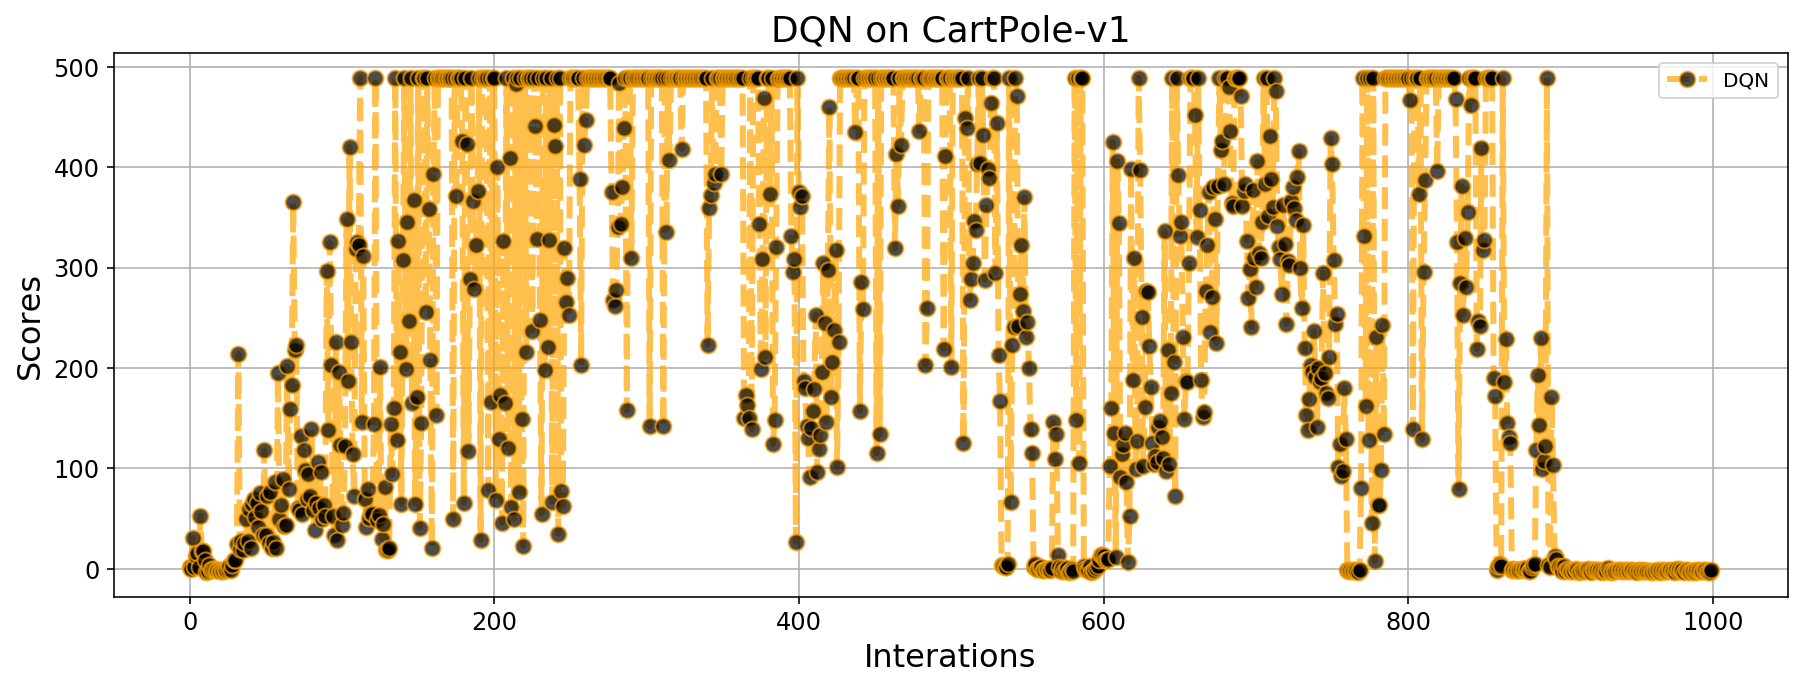

In [22]:
plt.figure(figsize=(15,5))
plt.plot(i_episode,scores,c='orange',marker='o',markersize=8,alpha=0.7,markerfacecolor='k',linewidth=3,label='DQN',linestyle='--')
plt.xlabel("Interations",fontsize=16)
plt.ylabel('Scores',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.title("DQN on CartPole-v1",fontsize=18)
plt.legend(loc=0)
plt.show()